In [46]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML, clear_output

In [47]:
# Gaussian Mixture Model. Defines the parameters of the GMM that generate the data.
class GMM_Generator:
    def __init__(self, num_clusters, seed=None):
        random.seed(seed)
        self.gaussians = []
        for _ in range(num_clusters):
            mean_x = random.random() * 10 - 5
            mean_y = random.random() * 10 - 5
            var_x = random.random() * .5 + .5
            var_y = random.random() * .5 + .5
            cov_xy = random.random() * 1 - .5
            v = [[var_x, cov_xy], [cov_xy, var_y]]
            self.gaussians.append(sps.multivariate_normal(mean=[mean_x, mean_y], cov=v))

    def generate_sample_points(self, n_points):
        values = np.zeros((2, n_points))
        for i in range(n_points):
            g = random.randint(0, len(self.gaussians) - 1)
            values[:, i] = self.gaussians[g].rvs()
        # print(values.T)
        return values.T

In [48]:
# Visualize the GMM over time.
def visualize_GMM(samples, log):
    (fig, ax) = plt.subplots()
    plt.scatter(samples[:, 0], samples[:, 1])

    def update(i):
        for e in ax.patches:
            e.remove()
        gaussians = log[i]
        for gmm in gaussians:
            v, w = np.linalg.eig(gmm.cov)
            v = np.sqrt(v)
            w[0] = w[0] / np.linalg.norm(w[0])
            angle = np.arctan(w[0][1] / w[0][0])
            angle = 180. * angle / np.pi
            for j in range(1, 3):
                ell = Ellipse(xy=(gmm.mean[0], gmm.mean[1]),
                              linewidth=2, width=v[0] * j * 2, 
                              height=v[1] * j * 2,
                              angle=90+angle)
                ell.set_facecolor('none')
                ell.set_edgecolor('black')
                ax.add_patch(ell)
        return ax

    ani = FuncAnimation(fig, update,
                        frames=len(log),
                        interval=300)
    plt.show()
    return HTML(ani.to_html5_video())

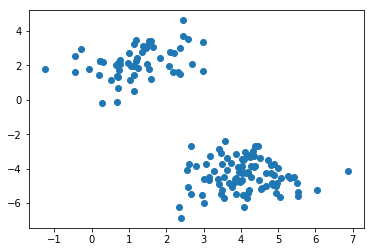

In [49]:
# instantiate gmm
num_clusters = 3
gmm = GMM_Generator(num_clusters, seed=15)

# randomly sample from all three gaussians
samples = gmm.generate_sample_points(150)

# plot sample points
plt.scatter(samples[:,0], samples[:,1])
plt.show()

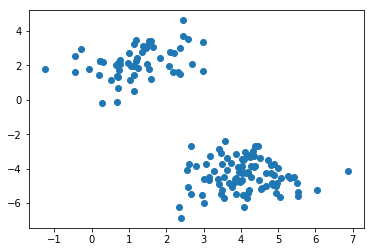

<video width="432" height="288" controls autoplay loop>
  <source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAADBj21kYXQAAAKtBgX//6ncRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU4IHIyOTg0IDM3NTlmY2IgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE5IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MyBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNo
PTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFw
bWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAIvxliIQA
Ff/+98nvwKbrW1u1v5PPSPwstz7CKj9uWxO06gAAAwAAGduVL4yG6guA+0AAPJnlI0zIf/iASZ7K
ve9X07WrEEdWNtLAsTepTW9DRerqAb0dRigY10KJs9kCKHhQVRYV+6tDhIysxlUTj/B/vzXtkHj2
FA/2z1M92lY7htNV9Nxj3D7tVobLnfL6QyqjgY/uTgi+mk1Q61rlyOd71A6pNGPt9mS4XvIuPs65
nN+AT03hehQHpB8PIxSsvPfuekhtXA3jqAf4137665ySgXjOYChqT4aCZ0/vWX56Q4vBidxpOyIT
VrVAkfliKMec7iYgYyLgsxLr7V17UYyOX05Co18rwRTWsfDEobZij31TJ25LdjNdgbqCWUJHNenc
LYD+x8HPFAUzFf6qkh3btBK+9DMPhuw3X4EHKA8Nqavq03CHqKuwk8ohxZeoevk5sAyIzXSFLGY2
h+DG7p85TCUKKq+Do9cCnBCw6hlXfA/0i6oqlXaMTqoviMK+8vFthzjK6BgHK5tkzFoocl3wbNnH
BbPhJ+EGZc/Q/vJSllPKXNsBqt7rZhQpQFV+cdS1PpKYa6is8vpTfCdqUkUw17jvaH3vB3rLRqaV
jQEaDfr3U84dkWmLxmOojyn+cGffSXZhoGpvz7JtYNkTQQgO0sYFYyvZGarp0mEsyxOgLvaJ7yFe
eeYcUXbMcmPNaBZkVrvjQst8o1nKjkLUEYxExfGVdd2DT0s6XSMNlBqz8wNsB675l0EBcRP6aQaB
oLkOKeuEwgqQDIxT7xJztb+LxCJqJ5UeZKAmMBHGgCQKTDoKvm+5X13YtqOisHsnKKXb2dAA2maK
BrZBllQhIiWd3GsvIAgAwQMShlGhf88JP2Aw6XZpE/d/gIbULGRbpfFakvbW/qGZ1GA5j42ZfQEQ
A6p/HKbCwymj2d0kF5MhgZSyymKpus1YdfSKizbyWQPAIvYBELmFh5NA0gKec/ZJ+kjWhZhzBSTg
Ko2SxB2sqWzCk4uPM8CzxFck4sPpSWZlH97OH/p2JbV7o2Lk5kM+VQdjPSqBs/1IAZvOGkr6WTmo
Tebcid7o9qBMteeUmynlNIvPb2WBgv6MEeYz5gKKdSg138Olh27v+IjtlA01lgIw8tcnr0WsX8Nw
WlbGVmpa06U18DsZ9e7ehkIc4KkUEXiwMgggmPQcW+TsMuUHqSjH62ZaA5DtFgmoL2djI3xxMV98
ImM8yP4oy8/J/S76QsBRw7Hjwr1JJAbJpaXvnW2LJc3bk5iTqrRnsOz2kZYPbngU+9VsQHsyFyml
CNLlq8kVatLZyVyvQE3fChh8jHxh+Pki8ALaqxGSpuHpE6yAPtYplJbp102X2/PjjsPuvGzq7wYi
J/oTk6noPRBKOSFs9dEPdINVtuPtgI4CcDLuch8Ql6th+LPzvFfhy14EJrcaGLHNjsIisMuC+8pP
AdgsI3tGwCg9DA0xojxwoWpX2dZEMNpqwrawEQA6ow14odTbXTa8mTPC6HWZzGgQGFkY50Imaxlc
9+ARFZcKyqg7pyosnK1ezHSJFQney/Hc7XAChS4JQw4BDN4yd2Pm8Mu2wtNVkCwhDW7dnk7JVL7v
UmAlh0xw1PJeesC8dAXtMPAJkrlGkamjAO2TwgKgPO7XwREkn/o/ZGR7fqZG+qgWAhpnXhv+XnGD
Zg2kJW+C5hpepfi5fIsUR0WTpc575/7LhQ6Gg7Npt9du70WB8f8c2asHp460xgNp74eywvqpUFwZ
B5f/HLDQWZfJRHRfrR/GMGzEyMMWr8xuyLpCT/3egHR2pDLRbvGKNvN3EFAtD3od751+UdA+4L1K
P2NAdyVJDA8RhOSZI83gg0sXGI4SCTHmfrZpzfTkSwLbwyYq0Phi7SiF8cKBHKeBtR0RYlwC57rq
vQpgfdT/AlJqjkaKGRe6ZWfJ9V5Rq9fqQL9+CkqAutZXhQrssv2P77mlfWkQwlwSBTlVfqzrlgdT
+yprt5nySSe8d8ZZudju3cT1tJsBANezk2rZlV/DpfmO7jmSe/HOYVvJTSM8A5CsHqKL5EFA39hU
eGe46TO4HcVFi3R4iSWVmnQAVzcY6oyCDUpKdbrMriRsAKAEUQ8TgnhSmBLru42PjH5aEeLgSCc1
jpf3v8ybq01xBis+4vPIpGBxU20vZOiaKqdPF72ZNKhpR5IvuoTp5A/xLa7d9qmYwglCNSYHqcbj
MI0EdOPWay42gPFqVCwaYVAppewr37C2koyt5USp8dlhhYt5GIriozEtsupJ5nICsZ3bvC1Duu0/
I0OZD6Fdymyc0zqTZ10CrZAAT9htVlKF0Qf2G1ktWf57Dg3spM/A6PYYq4j4PGz9p7zHxYtgqFo4
ggVr5qOP/ofn81RWVGspiSnqf+We8YMMtqIGz7OoqznL2TQ0xCvMuI0ShdE0l50RKmTovrLZc98W
Cd7rPdeMuYjOMEkISQW53YyX18qZEvGAJH6xgaRoWx/WNW0iuXMMdfkXx2BNgJF+Hyd4c2SSOgzk
+zfLtjhvan50GRsgjsmcUu+pA6welDH6kwAS20raP0guWT5+3X+EppcZ3IDxvJKwh+iHYHxa2Gcq
Yq5JDsf1yTCftSrF2jRYJgFt1xzJJGXZJ73HVlZnPd16rpqayjGNsgm1F1mHz2eTmJQFah1y6IFk
6lDizvr60RxI+/7BEZ1zv80+AAgWCj2T5YYvcaUFoF3FALt8Rv6C0JeenCCb8lbSCkhdqz4ihhN0
nz29zX7y+yfp8pLq7CInDhYFyuAldxJtV4wNkjO0pJwpuABe8p2a+vPpSAMBYQ7+7f3bLBBJ3aDP
qzOtfXopBHtsAY02WKlynOqMfMTAAX1jMotXCY8j

In [50]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
##TODO use the Gaussian mixture model described in class to try and recover the true parameters that generated the data
# To start initialize means and set high variances for each of your clusters using scipy.stats.multivariate_normal
# This code should be similar to how the GMM generates its true cluster values
# Next loop over the points and use scipy.stats.multivariate_normal.pdf to determine the closest point
# Once you have looped over each sample then compute the new statistics for the clusters
# Repeat this process until no points have shifted the GMM they belong to

# TODO: Use the expectation maximization algorithm to recover the true parameters of the GMM that generated the data
def gmm_solver(samples, num_clusters):
    # Keep track of gaussians at each stage of EM (for visualization purposes)
    log = []

    # Note: We've provided some code to get you started. *** Feel free to alter the
    #       provided code in any way you like. *** The only requirement is that you
    #       append the current set of gaussians that make up the GMM at each step
    #       of the EM algorithm. This is done for visualization purposes. You will
    #       be marked in-part on the visualization.
    gaussians = []
    for _ in range(num_clusters):
        ### START OF YOUR CODE ###
        # Instructions: Use a random mean and a large variance for each cluster.
        #               You should append the initialized sps.multivariate_normal
        #               to the 'gaussians' list defined above.
        mean_x = random.random() * 10 - 5
        mean_y = random.random() * 10 - 5
        var_x = 10000
        var_y = 10000
        cov_xy = random.random() * 1 - .5
        v = [[var_x, cov_xy], [cov_xy, var_y]]
        gaussians.append(sps.multivariate_normal(mean=[mean_x, mean_y], cov=v))
        ### END OF YOUR CODE ###
    log.append(gaussians)

    # Arbitrarily initialize the mixture weights
    mixture_weights = [1 / num_clusters for _ in range(len(gaussians))]  # the weight of every cluster
    num_points = len(samples)  # the number of sample points
    # num_clusters: the number of clusters
    # mixture_weights = W.sum(axis = 0)/W.sum()



    for _ in range(50):
        W = []
        sample_assignments = [[] for _ in range(num_clusters)]
        ### START OF YOUR CODE ###
        # Instructions: Expectation Step. Iterate through each sample and assign
        #               it to the appropriate gaussian
        for i in range(num_points):
            pdf = []
            for j in range(num_clusters):
                pdf.append(mixture_weights[j] * gaussians[j].pdf(samples[i]))

            sample_assignments[np.argmax(pdf)].append(samples[i])
            W.append(pdf / np.sum(pdf))
        ### END OF YOUR CODE ###

        gaussians = []
        for i in range(num_clusters):
            # Instructions: Maximization Step. Based on the sample assignments you
            #               determined in the expectation step, instantiate a new
            #               set of gaussians with the appriate mean / convariance.
            #               Don't forget to update the 'mixture_weights' as well.
            ### START OF YOUR CODE ###
            x = []
            y = []
            for each in sample_assignments[i]:
                x.append(each[0])
                y.append(each[1])
            mean_x = np.mean(x)
            mean_y = np.mean(y)
            var_x = np.var(x)
            var_y = np.var(y)
            cov_xy = np.cov(x, y) # TODO: what is this cov?
            # v = [[var_x, cov_xy], [cov_xy, var_y]]
            # print("x:",mean_x,"y:",mean_y,"cov:",v)
            gaussians.append(sps.multivariate_normal(mean=[mean_x, mean_y], cov=cov_xy))
            sum_W = 0
            for j in range(num_points):
                sum_W+=W[j][i]
            mixture_weights[i] = sum_W / np.sum(W)  # the weight of every cluster
            ### END OF YOUR CODE ###
        log.append(gaussians)
    return log


log = gmm_solver(samples, num_clusters)
visualize_GMM(samples, log)
